# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Creating Path and Importing Data

In [45]:
# Creating path
path=r'C:\Users\William\July-2023 Airbnb Amsterdam'

In [46]:
# Importing data
df_listings=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_listings_cleaned.csv'), index_col = False)

In [79]:
df_listings_dets=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_listings_dets_cleaned.csv'), index_col = False)

C:\Users\William\AppData\Local\Temp\ipykernel_2932\728640266.py:1: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_dets=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_listings_dets_cleaned.csv'), index_col = False)


# Exploring Relationships (Heatmaps)

In [5]:
# Chicking for mixed data types
for col in df_listings.columns.tolist():
      weird = (df_listings[[col]].applymap(type) != df_listings[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_listings[weird]) > 0:
        print (col)

name
host_name
last_review


In [6]:
# Dropping mixed types
df_listings_2 = df_listings.drop('name', axis=1)

In [7]:
df_listings_3 = df_listings_2.drop('host_name', axis=1)

In [8]:
df_listings_4viz = df_listings_3.drop('last_review', axis=1)

In [9]:
df_listings_4viz.head()

,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2818,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2.10,1,44
1,1,3209,3806,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,1.03,1,47
2,2,20168,59484,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2.18,2,198
3,3,25428,56142,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,0.09,2,141
4,4,27886,97647,Centrum-West,52.386727,4.892078,Private room,150,2,171,2.03,1,199


In [10]:
sub_listings = df_listings_4viz[['neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [11]:
sub_listings.corr

<bound method DataFrame.corr of                                 neighbourhood        room_type  price  \
0      Oostelijk Havengebied - Indische Buurt     Private room     59   
1                                  Westerpark  Entire home/apt    160   
2                                Centrum-Oost  Entire home/apt     80   
3                                Centrum-West  Entire home/apt    125   
4                                Centrum-West     Private room    150   
...                                       ...              ...    ...   
20025                         Watergraafsmeer  Entire home/apt    340   
20026  Oostelijk Havengebied - Indische Buurt  Entire home/apt    150   
20027                                Oud-Oost  Entire home/apt     80   
20028  Oostelijk Havengebied - Indische Buurt     Private room     55   
20029                 De Pijp - Rivierenbuurt  Entire home/apt    220   

       minimum_nights  number_of_reviews  reviews_per_month  \
0                   3       

C:\Users\William\AppData\Local\Temp\ipykernel_2932\1691866604.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(sub_listings.corr())


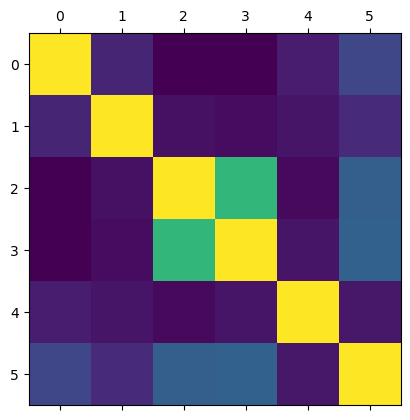

In [12]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_listings.corr())
plt.show()

C:\Users\William\AppData\Local\Temp\ipykernel_2932\2355882716.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(sub_listings.corr())


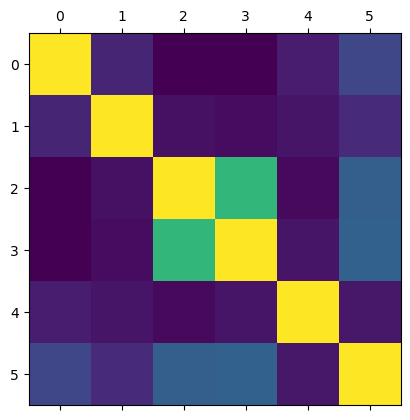

In [13]:
# Save figure
plt.matshow(sub_listings.corr())
plt.savefig("out.png") 

C:\Users\William\AppData\Local\Temp\ipykernel_2932\2315404363.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(sub_listings.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

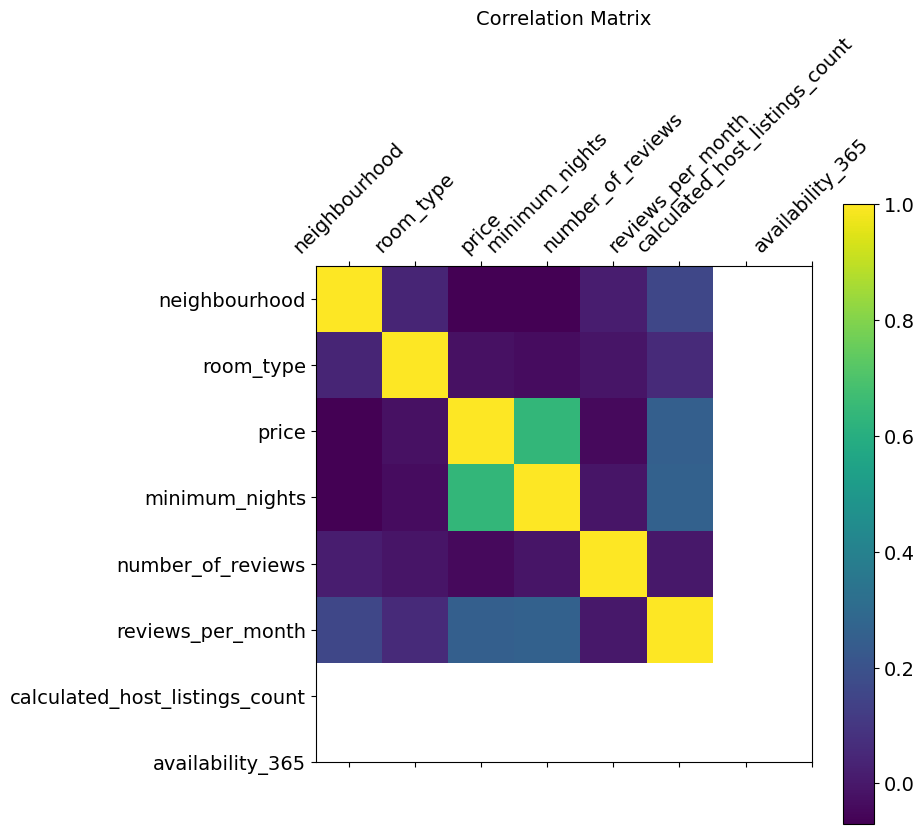

In [14]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_listings.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_listings.shape[1]), sub_listings.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_listings.shape[1]), sub_listings.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

C:\Users\William\AppData\Local\Temp\ipykernel_2932\2336399622.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(sub_listings.corr(), annot = True, ax = ax)


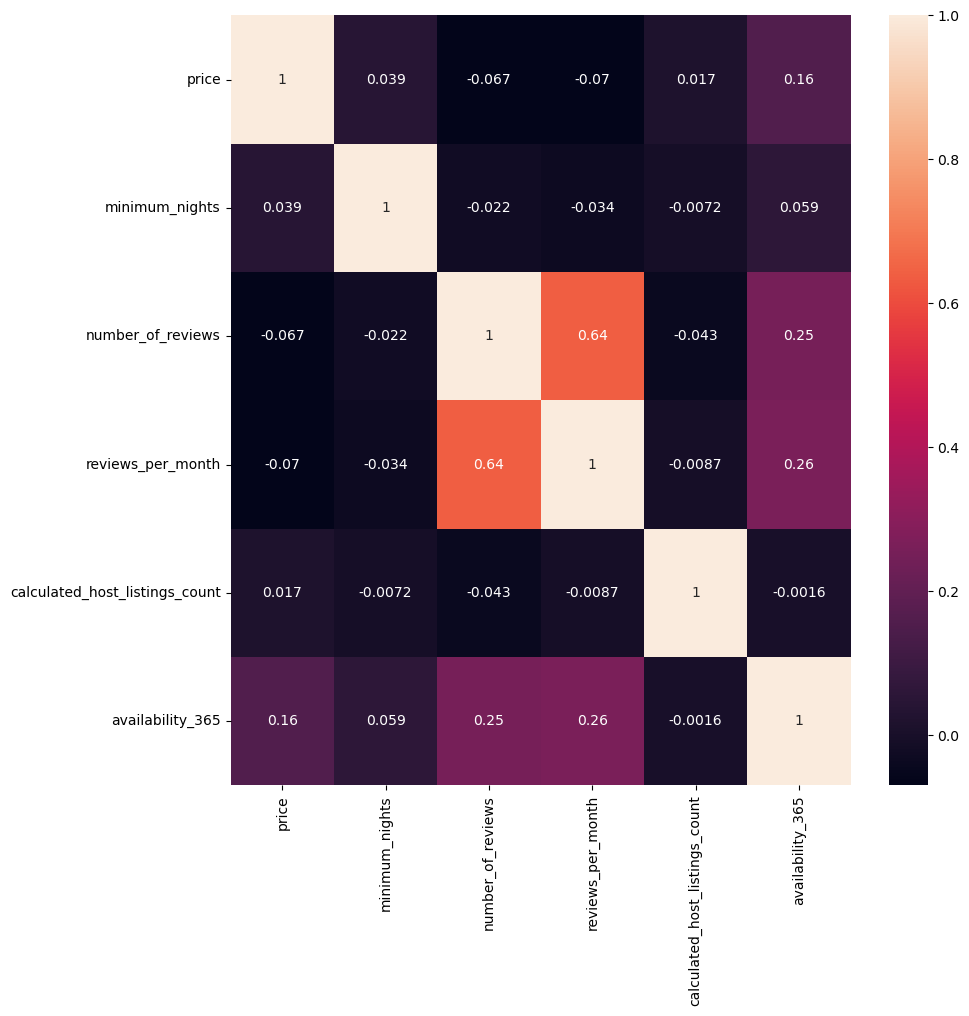

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_listings.corr(), annot = True, ax = ax)

# 3
#### The variables that correlate are between "minimum_nights" and "availability_365". It has a coefficient of .59 and anything between .5-1.0 have a strong correlation. Also, "number_of_reviews" and "reviews_per_month" have a coefficient of .64. 

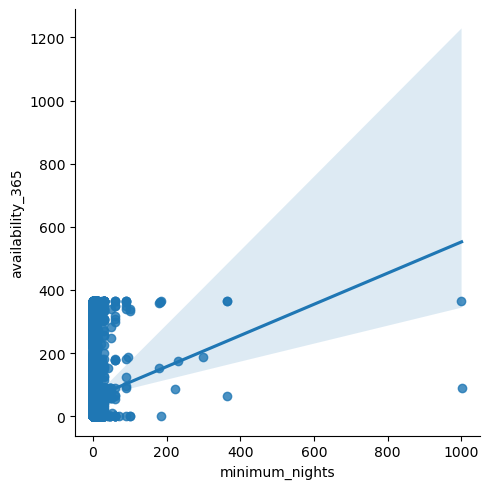

In [16]:
# Create a scatterplot for the "minimum nights" and "availability 365" columns in seaborn

sns.lmplot(x = 'minimum_nights', y = 'availability_365', data = sub_listings)

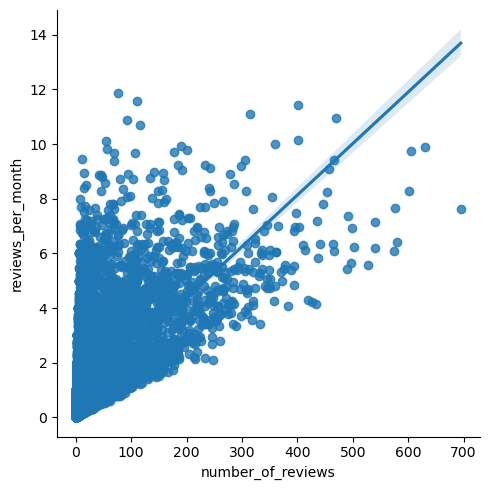

In [17]:
# Create a scatterplot for the "number of reviews" and "reviews per month" columns in seaborn

sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = sub_listings)

# 4
#### The heat maps suggest a strong correlation between "minimum_nights" and "availability_365". The dots are clustered however they don't really show a trend line. And there seems to be quite a few outliers. Regarding "number_of_reviews" and "reviews_per_month", there is a cluster, but the results seem to be the same as the other scattered plot, a lot of outliers.

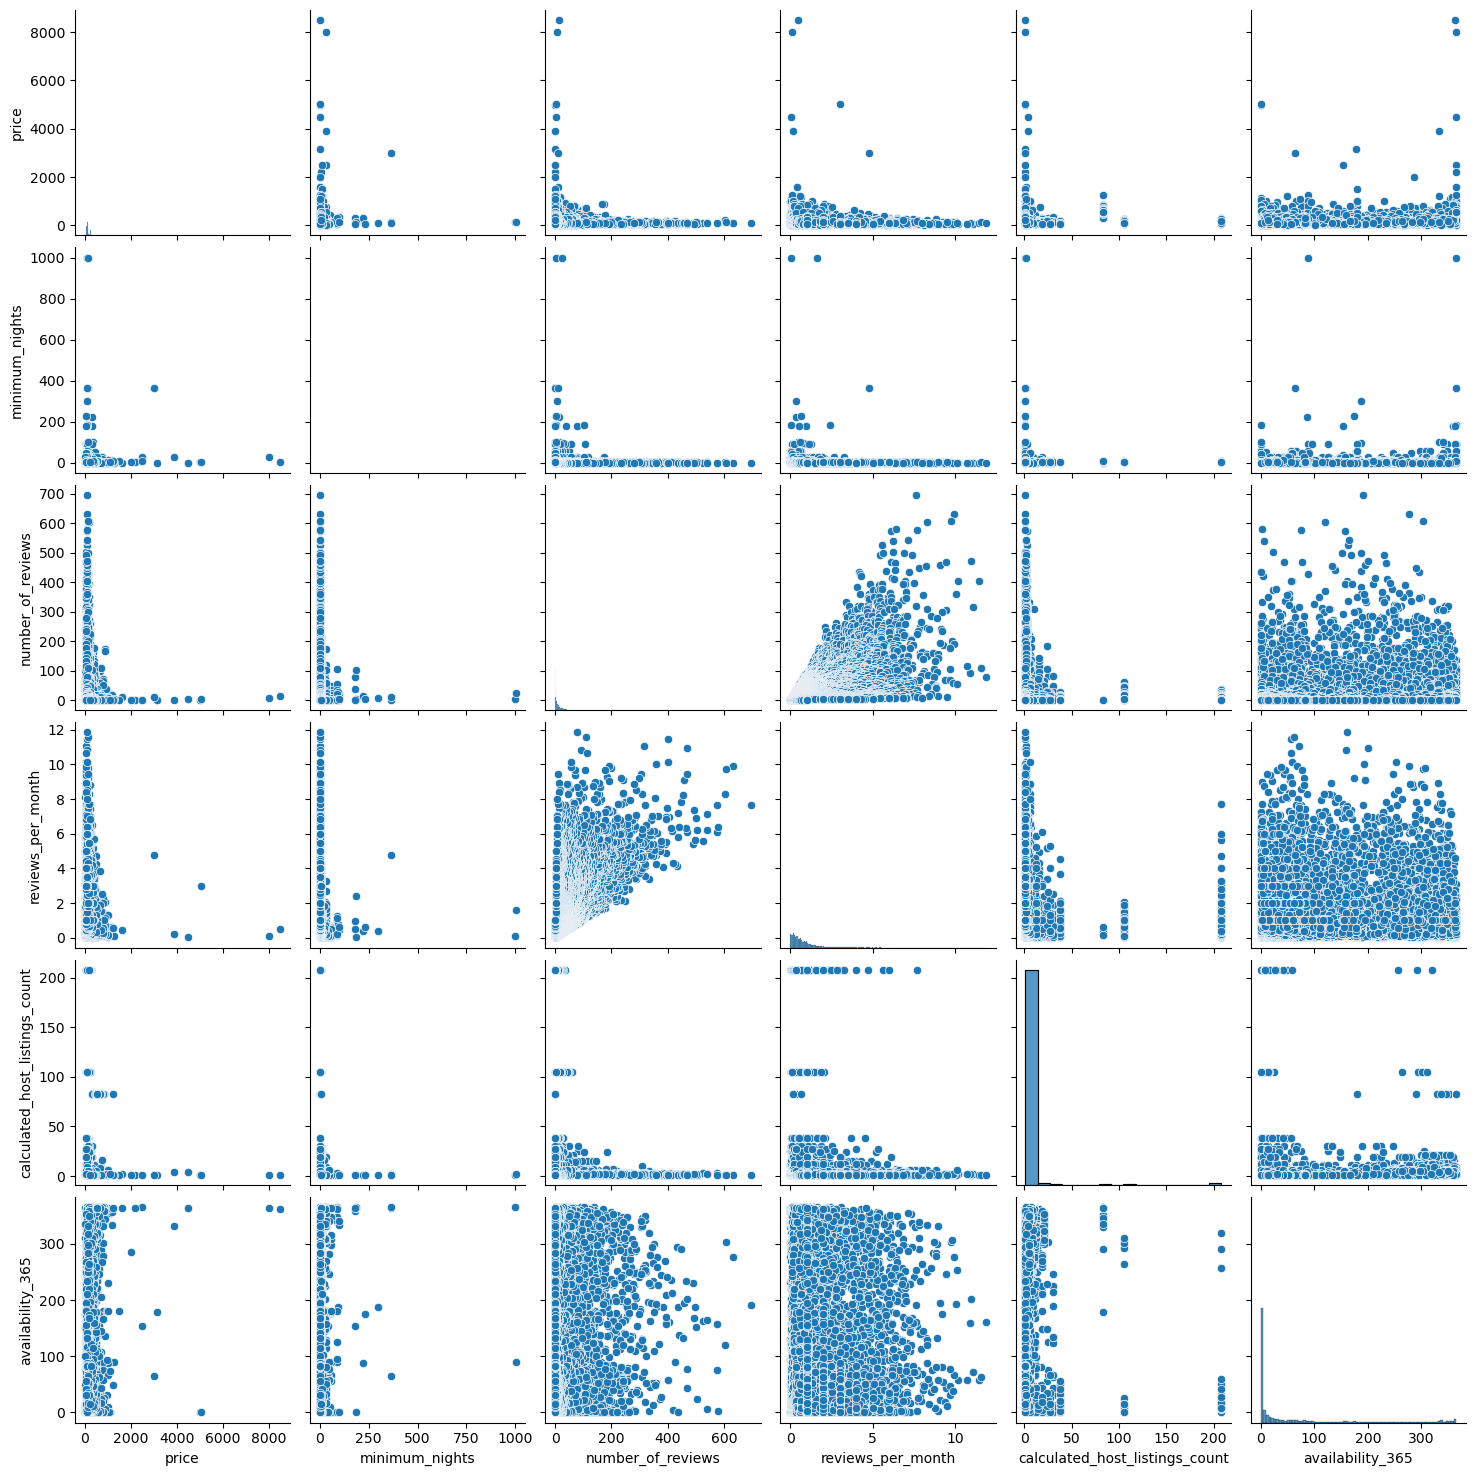

In [18]:
# Create a pair plot 

g = sns.pairplot(sub_listings)

# 5
#### Based on all these charts, I'm most interested in price, reviews, and availability. Those seem to be contributing factors to why properties might be chosen by the Airbnb's clientle.

<Axes: xlabel='price', ylabel='Count'>

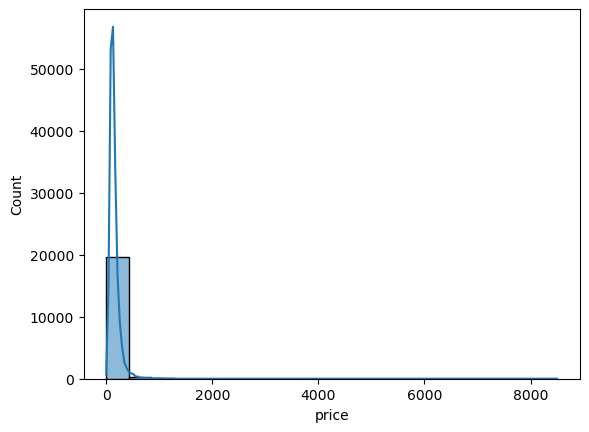

In [19]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_listings_4viz['price'], bins = 20, kde = True)

In [20]:
# Creating categorical variables to split "price" into 3 sections
df_listings_4viz.loc[df_listings_4viz['price'] < 150, 'Price category'] = 'Low price'

In [21]:
df_listings_4viz.loc[(df_listings_4viz['price'] >= 150) & (df_listings_4viz['price'] < 300), 'Price category'] = 'Middle price'

In [22]:
df_listings_4viz.loc[df_listings_4viz['price'] >= 300, 'Price category'] = 'High price'

In [23]:
df_listings_4viz['Price category'].value_counts(dropna = False)

Low price       12366
Middle price     6498
High price       1166
Name: Price category, dtype: int64

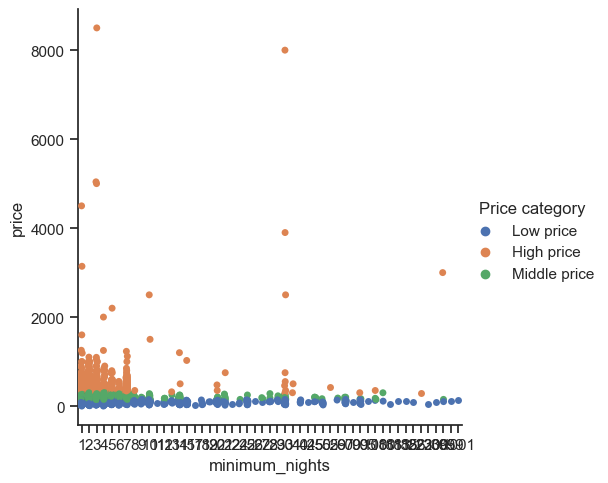

In [24]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="minimum_nights", y="price", hue="Price category", data=df_listings_4viz)

In [25]:
# fig = g.get_figure()
g.savefig("out.png") 

# 6
#### The high price rentals seem to be the properties that have the least number of minimum nights. While low price properties have the most variance when it comes to minimum number of nights. More houses are available for longer at the low price.

# 7
#### "Does the price of an Airbnb affect how frequently it’s rented?"
#### It seems that the higher the price of the property, the shorter your rental period will be.

# 8
#### Hypothesis: If you want a longer duration of rental, then you're more likely to find them by looking for lower priced properties

In [26]:
df_listings_dets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20030 non-null  int64  
 1   id                                20030 non-null  int64  
 2   listing_url                       20030 non-null  object 
 3   scrape_id                         20030 non-null  int64  
 4   last_scraped                      20030 non-null  object 
 5   name                              19992 non-null  object 
 6   summary                           19510 non-null  object 
 7   space                             14579 non-null  object 
 8   description                       19906 non-null  object 
 9   experiences_offered               20030 non-null  object 
 10  neighborhood_overview             13257 non-null  object 
 11  notes                             9031 non-null   object 
 12  tran

In [27]:
# Chicking for mixed data types
for col in df_listings_dets.columns.tolist():
      weird = (df_listings_dets[[col]].applymap(type) != df_listings_dets[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_listings_dets[weird]) > 0:
        print (col)

name
summary
space
description
neighborhood_overview
notes
transit
access
interaction
house_rules
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_has_profile_pic
host_identity_verified
neighbourhood
city
state
zipcode
market
weekly_price
monthly_price
security_deposit
cleaning_fee
first_review
last_review
license
jurisdiction_names


In [71]:
sub_listings_dets_1 = df_listings_dets[['review_scores_rating', 'review_scores_cleanliness', 'price', 'review_scores_value', 'review_scores_communication', 'number_of_reviews']]

In [72]:
df_listings_dets.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,2818,https://www.airbnb.com/rooms/2818,2.020000e+13,12/6/2018,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,1,3209,https://www.airbnb.com/rooms/3209,2.020000e+13,12/6/2018,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,2,20168,https://www.airbnb.com/rooms/20168,2.020000e+13,12/6/2018,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,3,25428,https://www.airbnb.com/rooms/25428,2.020000e+13,12/6/2018,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,4,27886,https://www.airbnb.com/rooms/27886,2.020000e+13,12/6/2018,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [73]:
df_listings_dets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20030 non-null  int64  
 1   id                                20030 non-null  int64  
 2   listing_url                       20030 non-null  object 
 3   scrape_id                         20030 non-null  float64
 4   last_scraped                      20030 non-null  object 
 5   name                              19992 non-null  object 
 6   summary                           19510 non-null  object 
 7   space                             14579 non-null  object 
 8   description                       19906 non-null  object 
 9   experiences_offered               20030 non-null  object 
 10  neighborhood_overview             13257 non-null  object 
 11  notes                             9031 non-null   object 
 12  tran

Text(0.5, 1.0, 'Correlation Matrix')

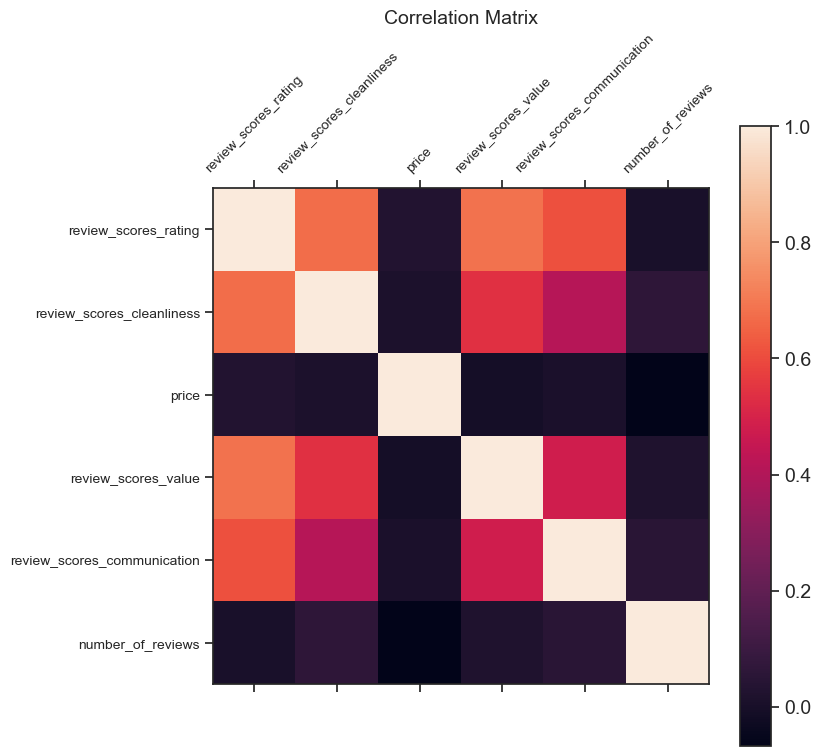

In [74]:
# creating heatmap with labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_listings_dets_1.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_listings_dets_1.shape[1]), sub_listings_dets_1.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(sub_listings_dets_1.shape[1]), sub_listings_dets_1.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

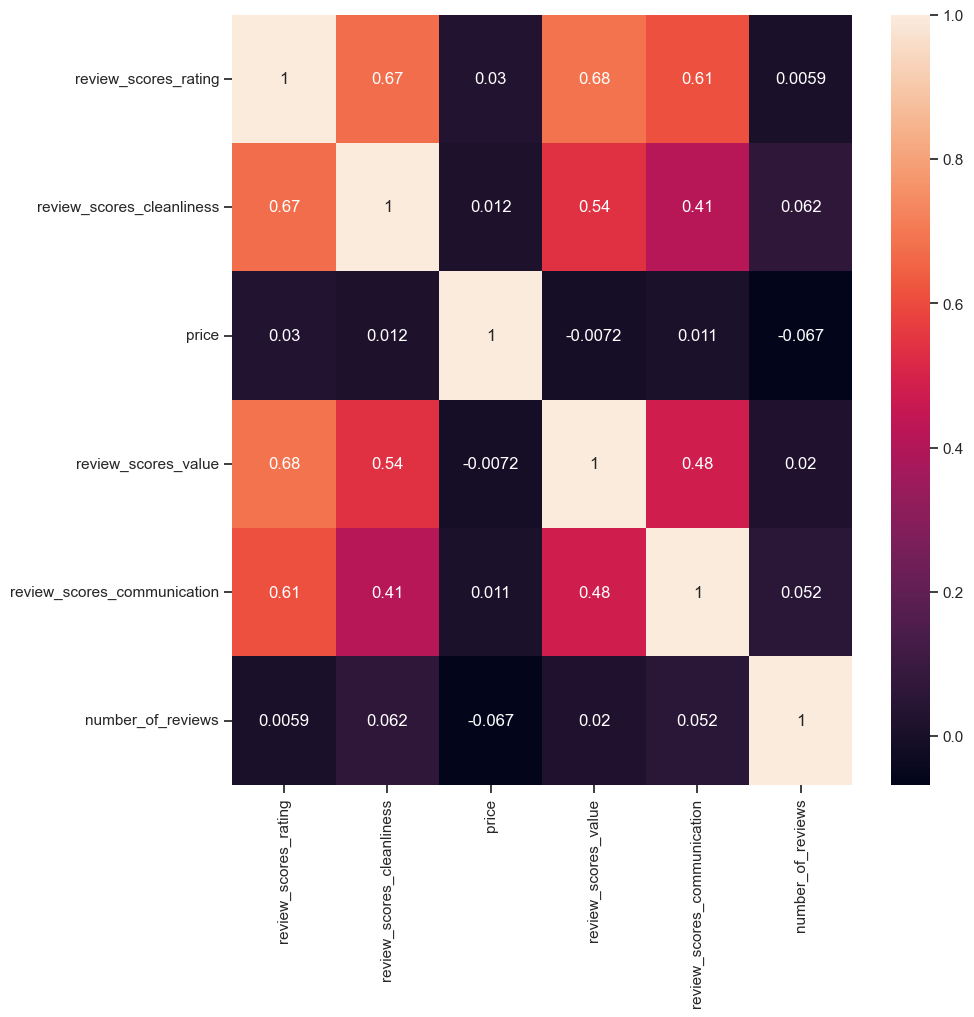

In [75]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_listings_dets_1.corr(), annot = True, ax = ax)

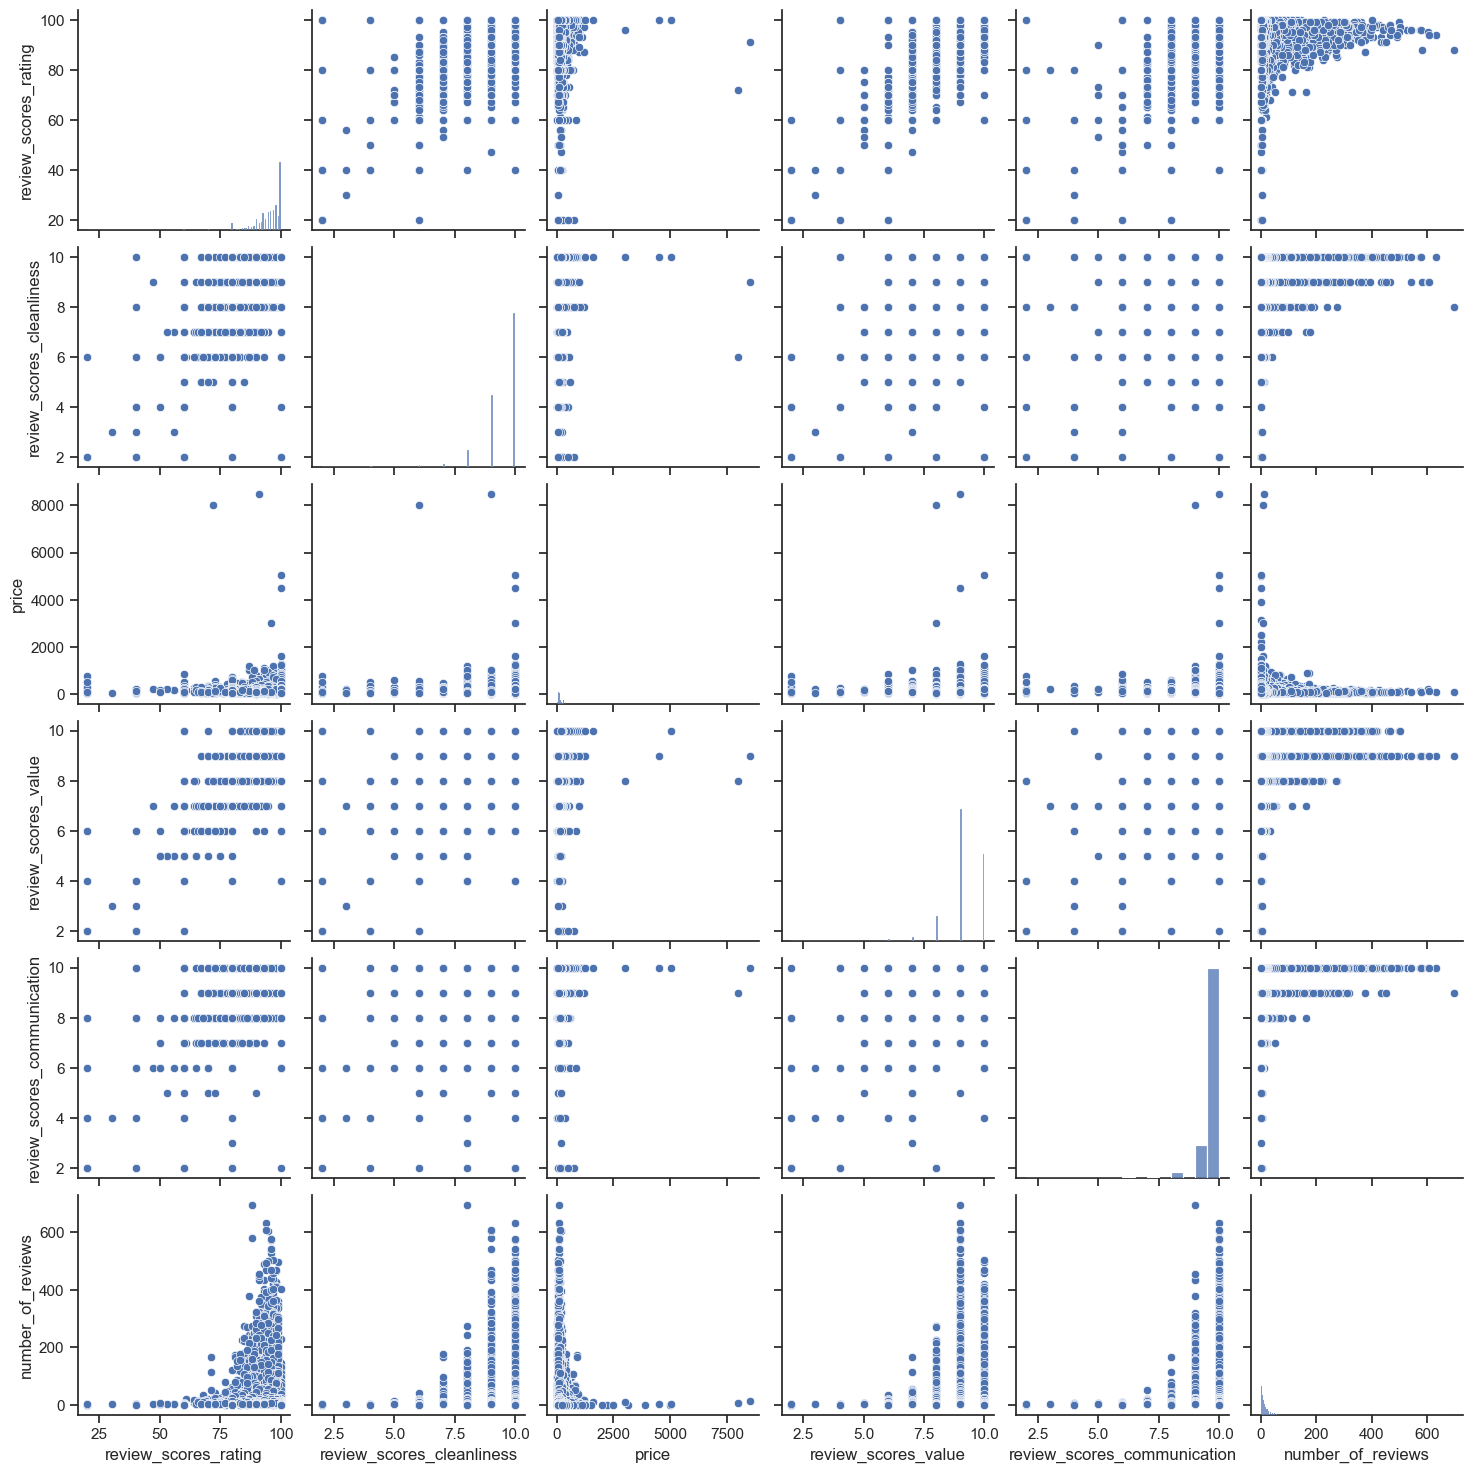

In [76]:
# Create a pair plot 

g = sns.pairplot(sub_listings_dets_1)

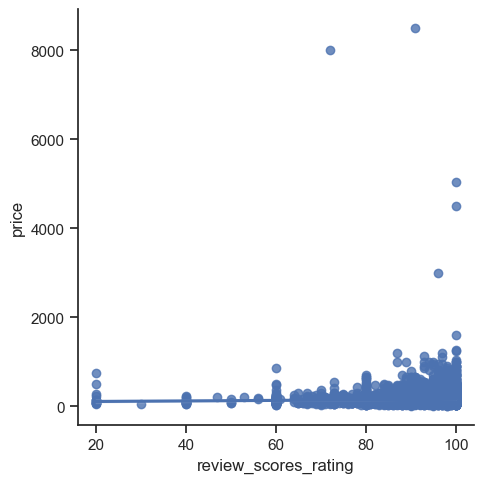

In [77]:
# Create a scatterplot for the "price" and "review_scores_rating" columns in seaborn

sns.lmplot(x = 'review_scores_rating', y = 'price', data = sub_listings_dets_1)

In [69]:
# Changing data types
sub_listings_dets_1['price'] = sub_listings_dets_1['price'].astype('float64')

C:\Users\William\AppData\Local\Temp\ipykernel_2932\671467736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_listings_dets_1['price'] = sub_listings_dets_1['price'].astype('float64')


In [70]:
sub_listings_dets_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         17391 non-null  float64
 1   review_scores_cleanliness    17383 non-null  float64
 2   price                        20030 non-null  float64
 3   review_scores_value          17371 non-null  float64
 4   review_scores_communication  17378 non-null  float64
 5   review_scores_location       17370 non-null  float64
dtypes: float64(6)
memory usage: 939.0 KB


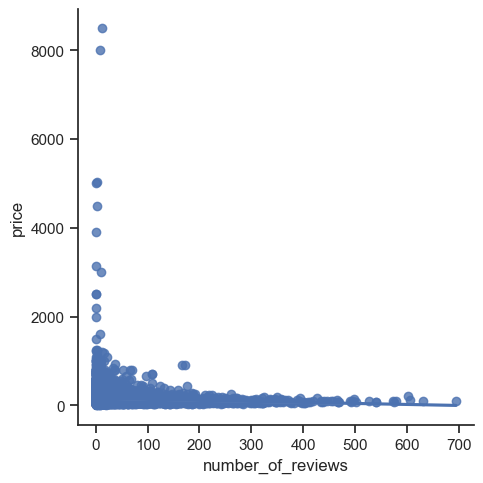

In [78]:
# Create a scatterplot for the "price" and "number_of_reviews" columns in seaborn

sns.lmplot(x = 'number_of_reviews', y = 'price', data = sub_listings_dets_1)

In [80]:
sub_listings_dets_2=df_listings_dets[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']]

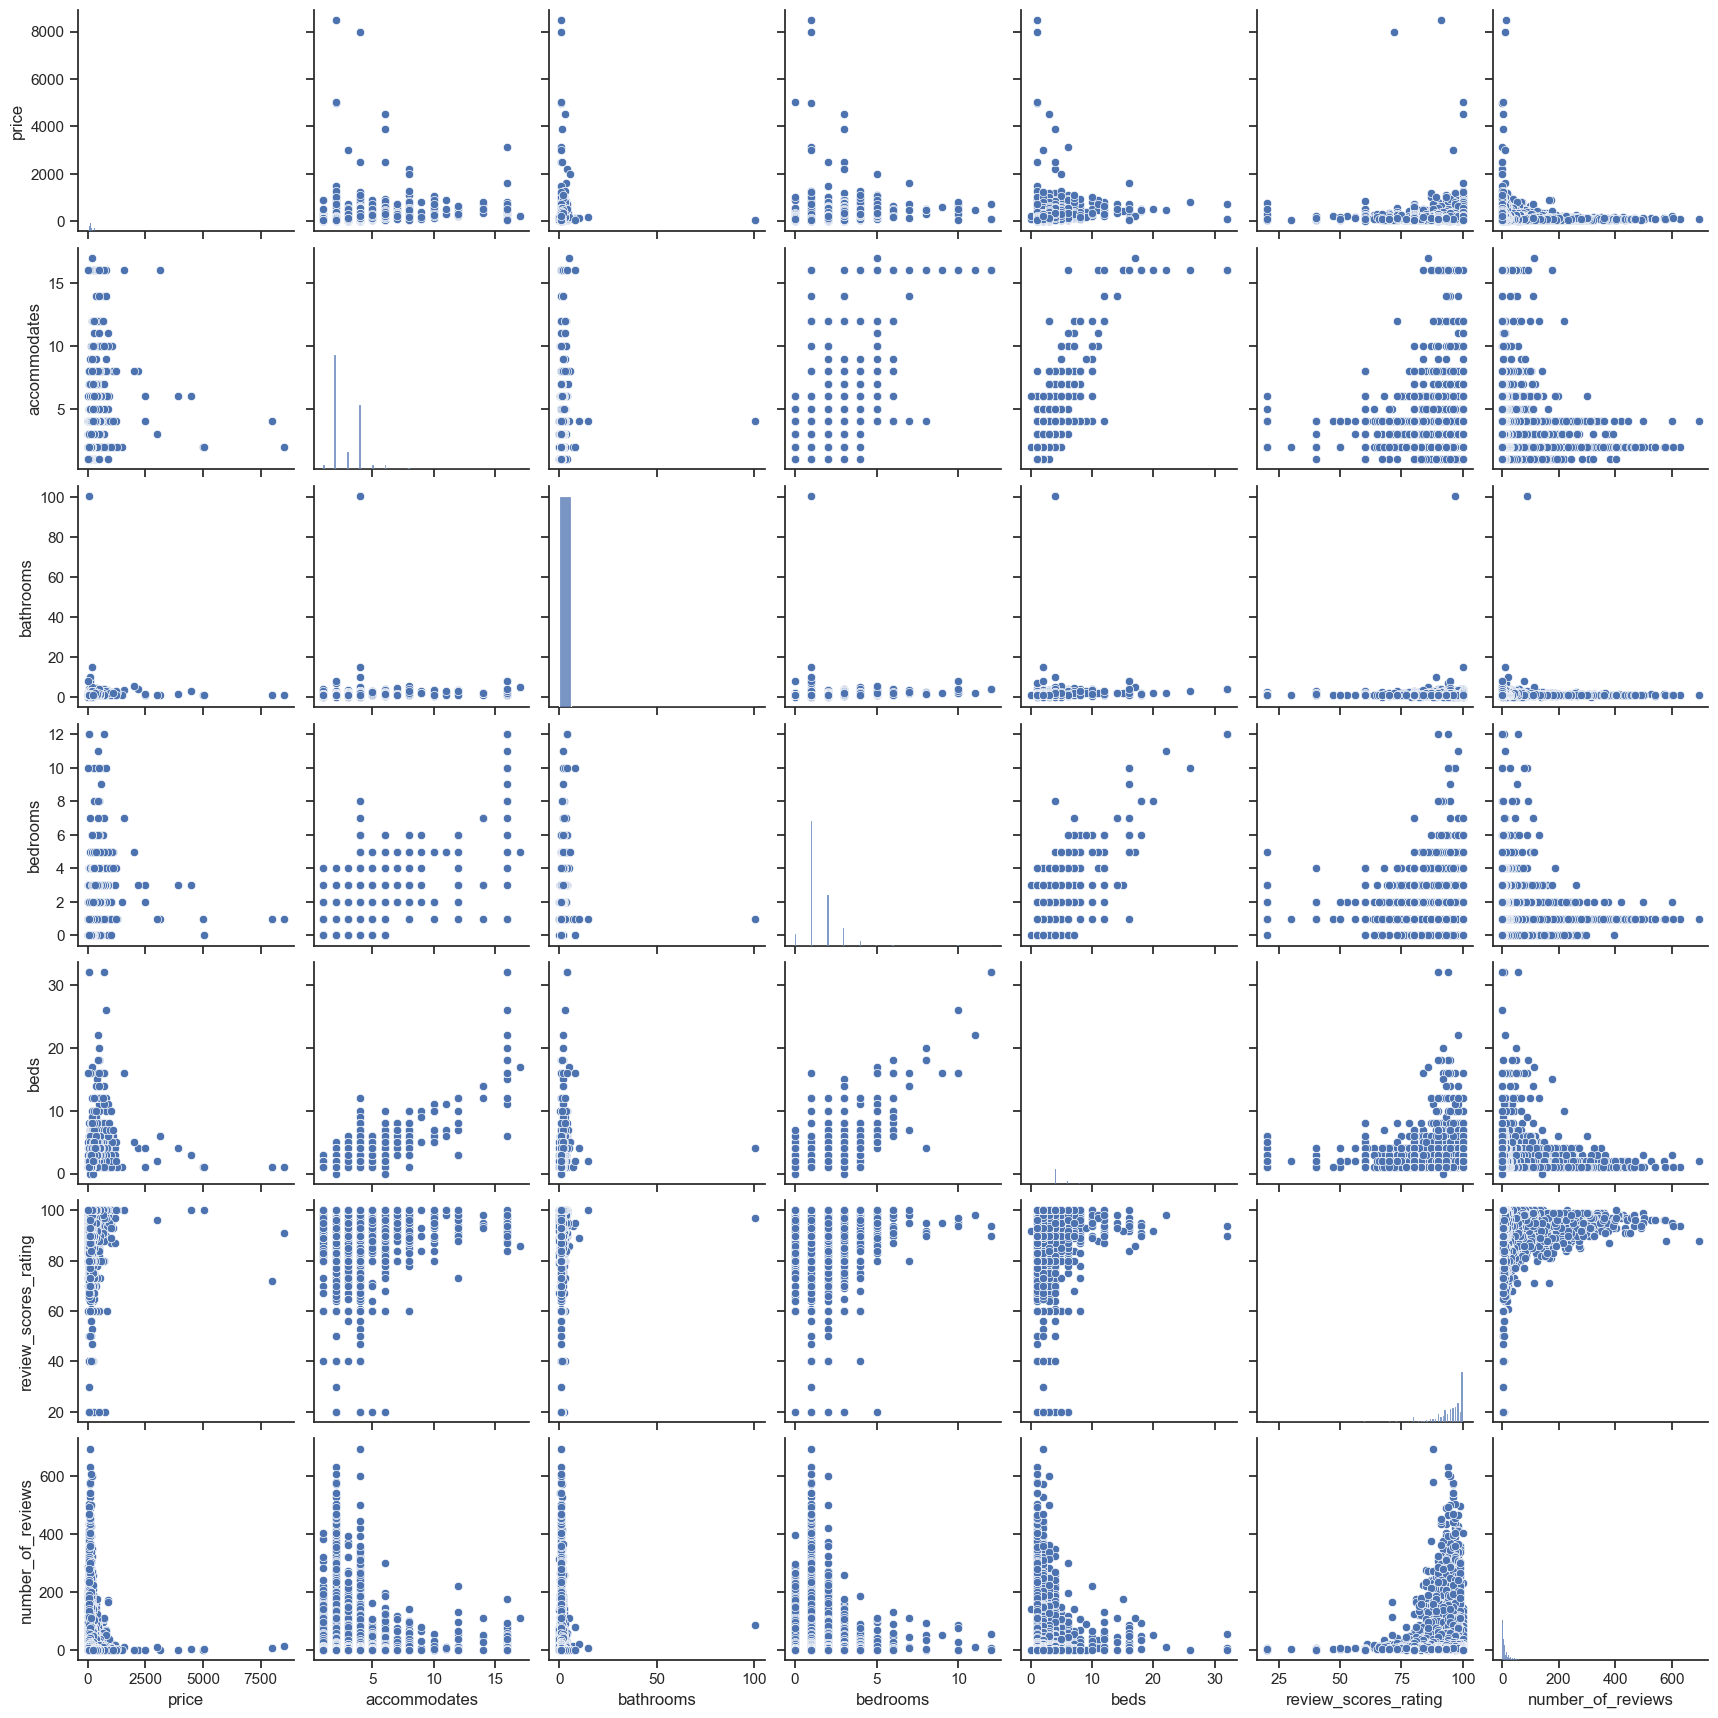

In [81]:
# Create a pair plot 

g = sns.pairplot(sub_listings_dets_2)

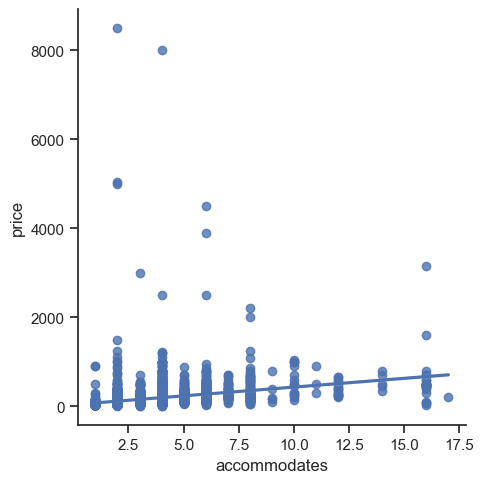

In [82]:
# Create a scatterplot for the "price" and "number_of_reviews" columns in seaborn

sns.lmplot(x = 'accommodates', y = 'price', data = sub_listings_dets_2)

In [84]:
# Checking correlations
df_listings_dets.corr()

C:\Users\William\AppData\Local\Temp\ipykernel_2932\1865582802.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_listings_dets.corr()


,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
Unnamed: 0,1.000000,0.998474,NaN,0.505651,0.127835,0.127835,-0.016183,0.003103,-0.003451,0.013879,...,-0.336761,-0.005065,-0.026035,-0.019960,-0.071674,-0.056043,-0.010246,-0.034803,0.111508,0.197037
id,0.998474,1.000000,NaN,0.506675,0.126760,0.126760,-0.016363,0.002785,-0.003617,0.014004,...,-0.341917,-0.006199,-0.026326,-0.020173,-0.072443,-0.057088,-0.010762,-0.035035,0.111256,0.194714
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.505651,0.506675,NaN,1.000000,0.027234,0.027234,-0.014046,0.029208,0.009265,0.001968,...,-0.147320,-0.106284,-0.088874,-0.072221,-0.100241,-0.095736,-0.031785,-0.091269,0.020983,0.174757
host_listings_count,0.127835,0.126760,NaN,0.027234,1.000000,1.000000,0.001625,-0.005977,0.044668,0.023983,...,-0.049402,-0.134096,-0.095536,-0.077395,-0.225576,-0.167332,-0.044685,-0.103367,0.865281,-0.011255
host_total_listings_count,0.127835,0.126760,NaN,0.027234,1.000000,1.000000,0.001625,-0.005977,0.044668,0.023983,...,-0.049402,-0.134096,-0.095536,-0.077395,-0.225576,-0.167332,-0.044685,-0.103367,0.865281,-0.011255
latitude,-0.016183,-0.016363,NaN,-0.014046,0.001625,0.001625,1.000000,-0.137699,0.015730,-0.011524,...,0.038902,0.002548,0.000028,-0.000267,0.002710,0.006703,0.023931,0.002861,0.006583,0.024526
longitude,0.003103,0.002785,NaN,0.029208,-0.005977,-0.005977,-0.137699,1.000000,0.086239,0.009793,...,0.005360,-0.010689,-0.007260,-0.019973,-0.000239,-0.008023,-0.003701,-0.003353,-0.012077,0.006454
accommodates,-0.003451,-0.003617,NaN,0.009265,0.044668,0.044668,0.015730,0.086239,1.000000,0.174389,...,-0.060191,-0.041297,-0.068653,-0.068399,-0.017767,-0.032659,-0.046536,-0.056124,0.020234,-0.077658
bathrooms,0.013879,0.014004,NaN,0.001968,0.023983,0.023983,-0.011524,0.009793,0.174389,1.000000,...,-0.012965,0.011780,0.004922,0.006042,0.000881,0.003430,0.009515,0.003239,0.017471,-0.006643


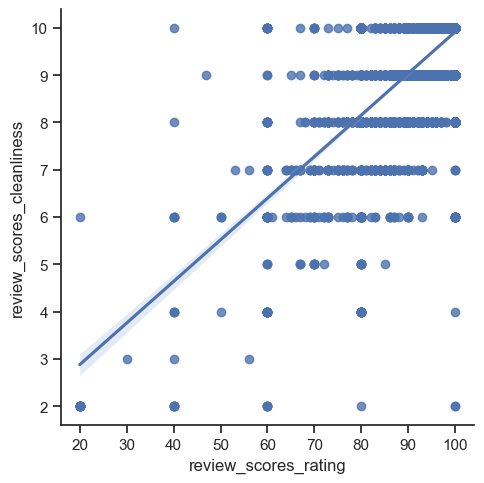

In [85]:
# Create a scatterplot for the "review scores rating" and "review scores cleanliness" columns in seaborn

sns.lmplot(x = 'review_scores_rating', y = 'review_scores_cleanliness', data = sub_listings_dets_1)

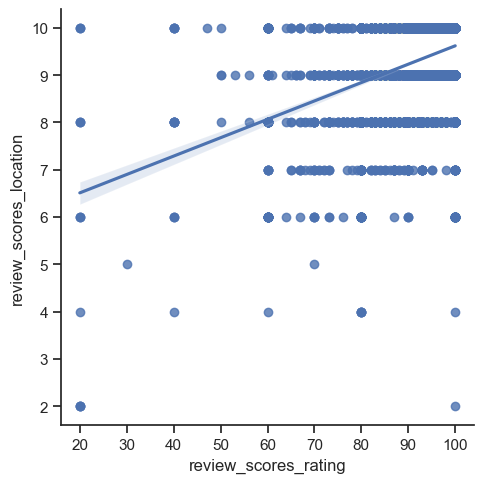

In [87]:
# Create a scatterplot for the "review scores rating" and "review scores location" columns in seaborn

sns.lmplot(x = 'review_scores_rating', y = 'review_scores_location', data = df_listings_dets)

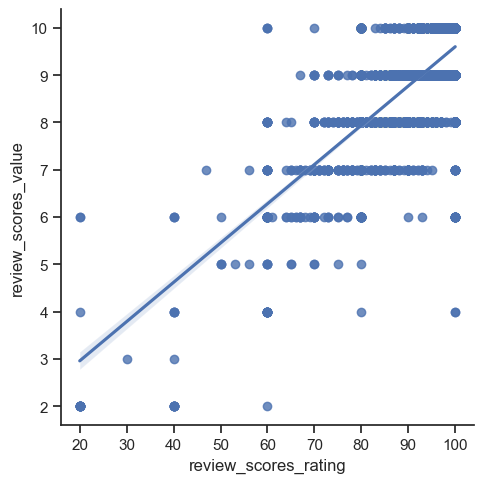

In [88]:
# Create a scatterplot for the "review scores rating" and "review scores value" columns in seaborn

sns.lmplot(x = 'review_scores_rating', y = 'review_scores_value', data = df_listings_dets)

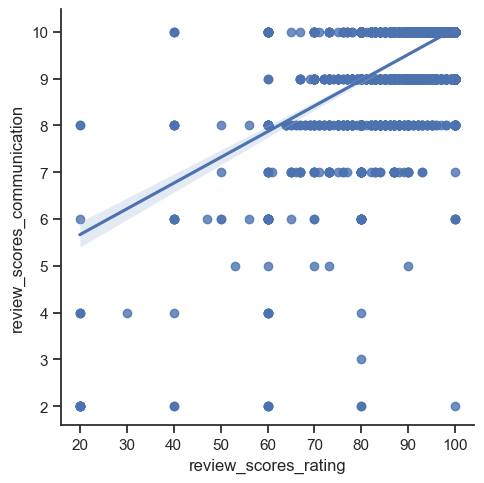

In [89]:
# Create a scatterplot for the "review scores rating" and "review scores communication" columns in seaborn

sns.lmplot(x = 'review_scores_rating', y = 'review_scores_communication', data = df_listings_dets)

In [90]:
# Checking for more correlations
df_listings.corr()

C:\Users\William\AppData\Local\Temp\ipykernel_2932\3485505776.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_listings.corr()


,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Unnamed: 0,1.000000,0.998474,0.505651,-0.016183,0.003103,0.022847,-0.028374,-0.336761,0.197037,0.111508,-0.045430
id,0.998474,1.000000,0.506675,-0.016363,0.002785,0.021963,-0.028927,-0.341917,0.194714,0.111256,-0.048796
host_id,0.505651,0.506675,1.000000,-0.014046,0.029208,0.014464,-0.019406,-0.147320,0.174757,0.020983,0.037250
latitude,-0.016183,-0.016363,-0.014046,1.000000,-0.137699,0.006163,-0.007749,0.038902,0.024526,0.006583,0.011300
longitude,0.003103,0.002785,0.029208,-0.137699,1.000000,0.017813,0.001013,0.005360,0.006454,-0.012077,0.016150
price,0.022847,0.021963,0.014464,0.006163,0.017813,1.000000,0.039119,-0.067417,-0.069898,0.017409,0.159293
minimum_nights,-0.028374,-0.028927,-0.019406,-0.007749,0.001013,0.039119,1.000000,-0.022019,-0.033772,-0.007225,0.059486
number_of_reviews,-0.336761,-0.341917,-0.147320,0.038902,0.005360,-0.067417,-0.022019,1.000000,0.639888,-0.042615,0.252856
reviews_per_month,0.197037,0.194714,0.174757,0.024526,0.006454,-0.069898,-0.033772,0.639888,1.000000,-0.008700,0.263080
calculated_host_listings_count,0.111508,0.111256,0.020983,0.006583,-0.012077,0.017409,-0.007225,-0.042615,-0.008700,1.000000,-0.001557
